<a href="https://colab.research.google.com/github/saoter/AQM2023/blob/main/Workshop%204/Workshop_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import f


### Load dataset

In [2]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
from IPython.display import display, Image


# Display the image
display(Image(url="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png"))

In [4]:
# Calculate the length of the whole dataset
total_length = len(iris)
print("Length of the whole dataset:", total_length)

# Calculate the length of each species in the dataset
species_lengths = iris['species'].value_counts()
print("\nLength of each species in the dataset:")
print(species_lengths)


Length of the whole dataset: 150

Length of each species in the dataset:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


### We visualise density of all four variables

1.   List item
2.   List item



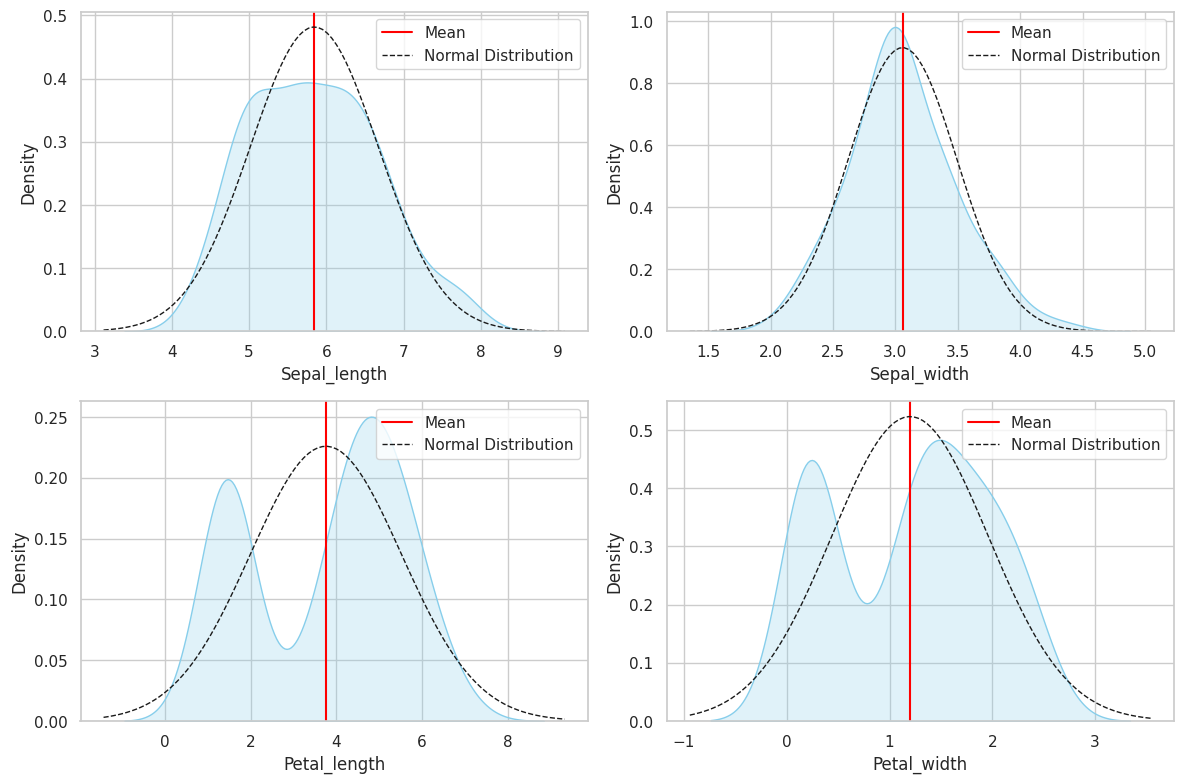

In [5]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot density curve (KDE) for each variable with mean and normal distribution lines
plt.figure(figsize=(12, 8))

variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 2, i)

    # Plot the density curve (KDE)
    sns.kdeplot(data=iris, x=var, fill=True, color='skyblue')

    # Calculate mean and standard deviation
    mean = iris[var].mean()
    std = iris[var].std()

    # Plot a line for the mean
    plt.axvline(mean, color='red', linestyle='solid', linewidth=1.5, label='Mean')

    # Plot a dotted line for normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k--', linewidth=1, label='Normal Distribution')

    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

### We visualize density of each spicies seperately

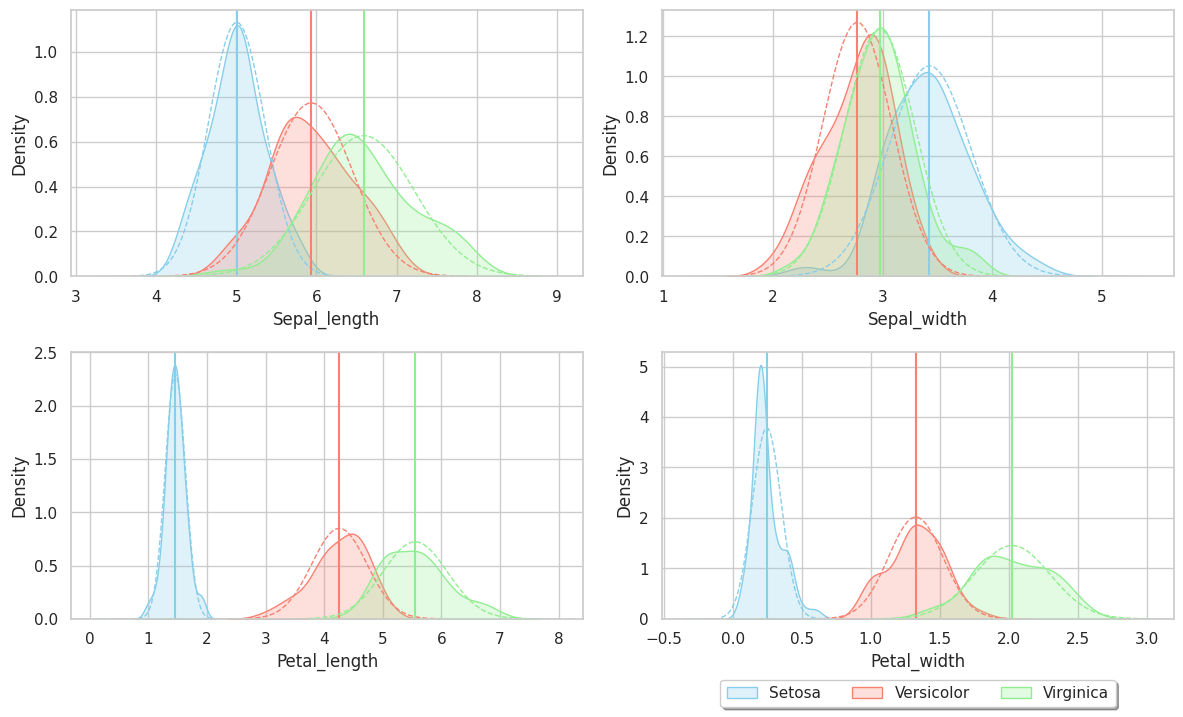

In [6]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Define colors for each species
species_colors = {'setosa': 'skyblue', 'versicolor': 'salmon', 'virginica': 'lightgreen'}

# Plot density curve (KDE) for each variable with mean and normal distribution lines for each species
plt.figure(figsize=(12, 8))

variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 2, i)

    # Iterate over each species
    for species, color in species_colors.items():
        # Filter data for the current species
        species_data = iris[iris['species'] == species]

        # Plot the density curve (KDE) for the current species
        sns.kdeplot(data=species_data, x=var, fill=True, color=color, label=f'{species.capitalize()}')

        # Calculate mean and standard deviation for the current species
        mean = species_data[var].mean()
        std = species_data[var].std()

        # Plot a line for the mean for the current species
        plt.axvline(mean, color=color, linestyle='solid', linewidth=1.5)

        # Plot a dotted line for normal distribution for the current species
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, linestyle='--', linewidth=1, color=color)

    plt.xlabel(f'{var.capitalize()}')
    plt.ylabel('Density')

# Add a single legend under the lower row of plots
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to leave space for the legend
plt.show()

### Observation of the plots

We can observe that specieses look more similar in Sepal_width, while in the other three they are quite different.

### Exercise

We are interested in sepal_width variable and assume that there is significant difference in mean between Versicolor and Virginica's sepal width.

**Null Hypothesis:**
$$ H_0: \mu_{\text{Versicolor}} - \mu_{\text{Virginica}} = 0 $$

**Alternative Hypothesis:**
$$ H_A: \mu_{\text{Versicolor}} - \mu_{\text{Virginica}} \neq 0 $$


### Are variances equal?

We perform F-test to check if variances in both species are the same.

**Null Hypothesis:**
$$ H_0: \sigma^2_{\text{1}} /  \sigma^2_{\text{2}} = 1 $$

**Alternative Hypothesis:**
$$ H_A: \sigma^2_{\text{1}} /  \sigma^2_{\text{2}}\neq 1 $$



To test reject the null hypothesis, F-value should fall into the Rejection reagion:


Upper tail (right tail): $ F > F_{(α/2, ν1, ν2)} = F_{(0.025, 49, 49} ≈ F_{(0.025, 50, 50)} = 1.75 $


Lower tail (left tail): $ F < F(1−α/2, ν1, ν2) = F(0.975, 49, 49) = 1/F(0.025, 49, 49) ≈ 1/F(0.025, 50, 50) ≈ 1/1.75 ≈ 0.57 $


In [7]:
# FIRST WAY
# Sepal width for each species
sepal_width_versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
sepal_width_virginica = iris[iris['species'] == 'virginica']['sepal_width']

# Calculate variances for each species
var_versicolor = sepal_width_versicolor.var()
var_virginica = sepal_width_virginica.var()

# Calculate the F-statistic
F_statistic = var_versicolor / var_virginica

# Degrees of freedom for the two samples
df1 = len(sepal_width_versicolor) - 1
df2 = len(sepal_width_virginica) - 1

alpha = 0.05

# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are not equal (reject null hypothesis)")
else:
    print("The variances are equal (fail to reject null hypothesis)")

The Rejection region is F > 1.7621885352431106  or F < 0.5674761695473411
F-statistic: 0.946783878183745
The variances are equal (fail to reject null hypothesis)


In [8]:
# SECOND WAY
# Calculate the p-value for the right tail
p_value_right = f.cdf(F_statistic, df1, df2)

# Calculate the p-value for the left tail
p_value_left = 1.0 - p_value_right

# Double the smaller of the two p-values for the two-tail test
p_value_two_tail = min(p_value_right, p_value_left) * 2

# Compare p-value with alpha to determine significance
if p_value_two_tail < alpha:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

The variances are not significantly different.


We have to use equal-variances test statistic.

In [9]:

# Perform Welch's t-test for sepal width between Versicolor and Virginica
t_statistic, p_value = ttest_ind(sepal_width_versicolor, sepal_width_virginica, equal_var=True) #the difference is only in equal_var argument

# Given significance level (alpha)
alpha = 0.05

# Calculate degrees of freedom
n1 = len(sepal_width_versicolor)
n2 = len(sepal_width_virginica)
df = n1 + n2 - 2

# Calculate critical t-value for a two-tailed test at the given alpha and degrees of freedom
critical_t_value = t.ppf(1 - alpha/2, df)


# Print the t-statistic, p-value, and critical t-value
print("T-statistic:", t_statistic)
print("p-value:", p_value)
print("Critical t-value (two-tailed, alpha=0.05):", critical_t_value)



T-statistic: -3.2057607502218186
p-value: 0.0018191004238894803
Critical t-value (two-tailed, alpha=0.05): 1.984467454426692


# Step by step


1. We are comparing two independent groups were we assume that the variances in groups are equal. Thus, we use ***equal variances t-test***


2. Formula:

$$ t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\left(\frac{{s_p^2}}{{n_1}}\right) + \left(\frac{{s_p^2}}{{n_2}}\right)}}} $$


3. We need means, variance estimators, sample sizes


4. Degrees of freedom in our test

$$ df = n_1 + n_2 - 2 $$


5. Sample Variance formulas:

$$ s_1^2 = \frac{{\sum (x - \bar{X}_1)^2}}{{n_1 - 1}} $$


$$ s_2^2 = \frac{{\sum (x - \bar{X}_2)^2}}{{n_2 - 1}} $$



6. Pooled Variance formula:

$$s_p^2 = \frac{{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}}{{n_1 + n_2 - 2}}
 $$

6.  Standard Error (SE):

$$ SE = \sqrt{\frac{{s_p^2}}{{n_1}} + \frac{{s_p^2}}{{n_2}}} $$


7. Calculate the t-statistic:

$$ t = \frac{({\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}}{SE}
 $$

8. Calculate p-value

$$ \text{p-value} = 2 \times \text{CDF}(-|\text{t}|, \text{df})
 $$

In [10]:

# Filter data for Versicolor and Virginica
versicolor_sepal_width = iris[iris['species'] == 'versicolor']['sepal_width']
virginica_sepal_width = iris[iris['species'] == 'virginica']['sepal_width']

# Calculate sample means
mean_versicolor = versicolor_sepal_width.mean()
mean_virginica = virginica_sepal_width.mean()

# Calculate sample variances with function var()
var_versicolor = versicolor_sepal_width.var()
var_virginica = virginica_sepal_width.var()

# Calculate pooled variance (assuming equal variances)
n1 = len(versicolor_sepal_width)
n2 = len(virginica_sepal_width)

# Calculate Degrees of Fredom
df = n1 + n2 - 2

# Calculate Pooled Variance
s_pooled = np.sqrt(((n1 - 1)*var_versicolor**2 + (n2 - 1)*var_virginica**2)/ df)


# Calculate standard error
SE = np.sqrt(s_pooled/n1 + s_pooled/n2)

# Calculate the t-statistic using Welch's formula
t_statistic = (mean_versicolor - mean_virginica) / SE


# Calculate critical t-value for a two-tailed test at 95% confidence level
alpha = 0.05
critical_t_value = t.ppf(1 - alpha/2, df)

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

# Print the calculated values
print('Sample Mean (Versicolor):', mean_versicolor)
print('Sample Mean (Virginica):', mean_virginica)
print('Sample Variance (Versicolor):', var_versicolor)
print('Sample Variance (Virginica):', var_virginica)
print('t-statistic:', t_statistic)
print('Degrees of Freedom:', df)
print('Critical t-value (two-tailed, alpha=0.05):', critical_t_value)
print('p-value:', p_value)

# Check if the t-statistic exceeds the critical t-value
if np.abs(t_statistic) > critical_t_value:
    print('The difference is statistically significant at 95% confidence level.')
else:
    print('The difference is not statistically significant at 95% confidence level.')

Sample Mean (Versicolor): 2.7700000000000005
Sample Mean (Virginica): 2.974
Sample Variance (Versicolor): 0.09846938775510206
Sample Variance (Virginica): 0.10400408163265305
t-statistic: -3.20516217419206
Degrees of Freedom: 98
Critical t-value (two-tailed, alpha=0.05): 1.984467454426692
p-value: 0.0018225241587128682
The difference is statistically significant at 95% confidence level.


## Interpretation

The t-statistic of approximately -3.21 is much smaller (in absolute value) than the critical t-value of approximately 1.98 for a 95% confidence level.
The p-value of approximately 0.00182 is less than the significance level of
α=0.05.

Given the t-statistic being highly negative and significantly smaller than the critical t-value, and the p-value being extremely small, we reject the null hypothesis.

Rejecting the null hypothesis suggests that there is a statistically significant difference in the mean sepal width between the Versicolor and Virginica species at a 95% confidence level.

# Exercises

## 13.1 - 13.6

Exercises are 'what if' analyses designed to determine what happens to the test statistics and interval estimates when elements of the statistical  inference change.



## 13.1

In random samples of 25 from each of two normal populations, we found the following statistics:

$$ \bar{x}_1 = 524 $$
$$ \bar{x}_2 = 469 $$
$$ s_1 = 129 $$
$$ s_2 = 141 $$

$$ n_1 = 25 $$
$$ n_2 = 25 $$


### a) Estimate the difference between the two population means with 95% confidence.


In [11]:
# Data
x1 = 524
x2 = 469

s1 = 129
s2 = 141

n1 = 25
n2 = 25

In [12]:
# We calculate F statistics to see if variances are equal

F_statistic = s1/s2

# calculate degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

alpha = 0.05


# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are significantly different (reject null hypothesis)")
else:
    print("The variances are not significantly different (fail to reject null hypothesis)")

The Rejection region is F > 2.269277277621426  or F < 0.4406689344936128
F-statistic: 0.9148936170212766
The variances are not significantly different (fail to reject null hypothesis)


In [13]:
# Calculate the standard error for the difference in means (assuming equal variances):
s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
standard_error = s_pooled * np.sqrt(1 / n1 + 1 / n2)

# Calculate the t-value for a two-tailed test at the desired confidence level:

t_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2)

margin_of_error = t_critical * standard_error

lower_bound = (x1 - x2) - margin_of_error
upper_bound = (x1 - x2) + margin_of_error
print(lower_bound, upper_bound)

-21.849395732047896 131.8493957320479


In [14]:
print(f"CI =  ", (x1 - x2)," \u00B1 ", margin_of_error)


CI =   55  ±  76.8493957320479


### *b*) Repeat part (a) increasing the standard deviations to s1 = 255 and s2 = 260.

In [15]:
# Data
x1 = 524
x2 = 469

s1 = 255
s2 = 260

n1 = 25
n2 = 25

In [16]:
# We calculate F statistics to see if variances are equal

F_statistic = s1/s2

# calculate degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are significantly different (reject null hypothesis)")
else:
    print("The variances are not significantly different (fail to reject null hypothesis)")

The Rejection region is F > 2.269277277621426  or F < 0.4406689344936128
F-statistic: 0.9807692307692307
The variances are not significantly different (fail to reject null hypothesis)


In [17]:
# Calculate the standard error for the difference in means (assuming equal variances):
s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
standard_error = s_pooled * np.sqrt(1 / n1 + 1 / n2)

# Calculate the t-value for a two-tailed test at the desired confidence level:

t_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2)

margin_of_error = t_critical * standard_error

lower_bound = (x1 - x2) - margin_of_error
upper_bound = (x1 - x2) + margin_of_error
print(lower_bound, upper_bound)

-91.44544881828219 201.4454488182822


In [18]:
print(f"CI =  ", (x1 - x2)," \u00B1 ", margin_of_error)

CI =   55  ±  146.4454488182822


### c) Describe what happens when the sample standard deviation get larger!

| Exercise 13.1 	|  Standard deviation 	|  Confidence Interval  	|
|---------------	|:-------------------:	|:---------------------:	|
| a             	| s1 = 129,  s2 = 141 	| CI =   55  ±  76.8493 	|
| b             	| s1 = 255,  s2 = 260 	| CI =   55  ±  146.445 	|


When standard deviation get larger, confidence interval widens.

```
# This is formatted as code
```



### d) Repeat part (a) with samples of size 100.


In [19]:
# Data
x1 = 524
x2 = 469

s1 = 129
s2 = 141

n1 = 100
n2 = 100

In [20]:
# We calculate F statistics to see if variances are equal

F_statistic = s1/s2

# calculate degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

# calculate p-value
p_value = f.sf(F_statistic, df1, df2)

# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are significantly different (reject null hypothesis)")
else:
    print("The variances are not significantly different (fail to reject null hypothesis)")

The Rejection region is F > 1.486233767619293  or F < 0.6728416631266823
F-statistic: 0.9148936170212766
The variances are not significantly different (fail to reject null hypothesis)


In [21]:
# Calculate the standard error for the difference in means (assuming equal variances):
s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
standard_error = s_pooled * np.sqrt(1 / n1 + 1 / n2)

# Calculate the t-value for a two-tailed test at the desired confidence level:

t_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2)

margin_of_error = t_critical * standard_error

lower_bound = (x1 - x2) - margin_of_error
upper_bound = (x1 - x2) + margin_of_error
print(lower_bound, upper_bound)

17.313306484286862 92.68669351571313


In [22]:
print(f"CI =  ", (x1 - x2)," \u00B1 ", margin_of_error)

CI =   55  ±  37.68669351571314


### e) Discuss  the  effects  of  increasing  the  sample  size.

| Exercise 13.1 	| Sample size 	|  Confidence Interval  	|
|---------------	|:-----------:	|:---------------------:	|
| a             	|    n = 25   	| CI =   55  ±  76.8493 	|
| d             	|   n = 100   	| CI =   55  ±  37.6866 	|



When the sample size increases the interval narrows!

## 13.7 to 13.15 use a 10% significance level.


#### 13.7

A human resources manager for a car company wanted to know whether production line workers have more days absent than office workers. He took a random sample of eight workers from each category and recorded the number of days absent the previous year. Can we infer that there is a difference in days absent between the two groups of workers?

In [23]:
Production_workers = np.array([4, 0, 6, 8, 3, 11, 13, 5])
Office_workers = np.array([9, 2, 7, 1, 4, 7, 9, 8])

alpha = 0.1


**Null Hypothesis:**
$$ H_0: \mu_{Production} = \mu_{Office} $$

**Alternative Hypothesis:**
$$ H_0: \mu_{Production} \neq \mu_{Office} $$

#### First we calculate the remaining of the variables and check if variances are significantly different.

In [24]:
n1 = len(Production_workers)
n2 = len(Office_workers)

var_production = Production_workers.var()
var_office = Office_workers.var()

print("n1 = ",n1)
print("n2 = ",n2)
print("Production variance = ", var_production)
print("Office variance = ", var_office)



n1 =  8
n2 =  8
Production variance =  15.9375
Office variance =  8.609375



**Null Hypothesis:**
$$ H_0: \sigma^2_{\text{1}} /  \sigma^2_{\text{2}} = 1 $$

**Alternative Hypothesis:**
$$ H_A: \sigma^2_{\text{1}} /  \sigma^2_{\text{2}}\neq 1 $$

In [25]:
df1 = n1 - 1
df2 = n2 - 1

# Calculate the F-statistic
F_statistic = var_production / var_office

# critical value
critical_F_value = f.ppf(1 - alpha / 2, df1, df2)


# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are significantly different (reject null hypothesis)")
else:
    print("The variances are not significantly different (fail to reject null hypothesis)")

The Rejection region is F > 3.7870435399280677  or F < 0.26405822628038605
F-statistic: 1.851179673321234
The variances are not significantly different (fail to reject null hypothesis)


In [26]:
# Perform Welch's t-test for sepal width between Production workers and Office workers
t_statistic, p_value = ttest_ind(Production_workers, Office_workers, equal_var=True)

# Calculate degrees of freedom

df = n1 + n2 - 2

# Calculate critical t-value for a two-tailed test at the given alpha and degrees of freedom
critical_t_value = t.ppf(1 - alpha/2, df)

# Print the t-statistic, p-value, and critical t-value
print("Welch's t-statistic:", t_statistic)
print("p-value:", p_value)
print("Critical t-value (two-tailed, alpha=0.05):", critical_t_value)


# Compare the p-value with the significance level to decide on statistical significance
if p_value < alpha:
    print("The difference in means is statistically significant (reject null hypothesis)")
else:
    print("The difference in means is not statistically significant (fail to reject null hypothesis)")

Welch's t-statistic: 0.2002544530291113
p-value: 0.8441613844492399
Critical t-value (two-tailed, alpha=0.05): 1.7613101357748562
The difference in means is not statistically significant (fail to reject null hypothesis)


In summary, based on the results and the chosen significance level (alpha=0.1), we fail to reject the null hypothesis. The difference in means of absent days between Production Workers and Office Workers is not statistically significant at the 10% significance level.

## Exercise 13.16

Data: Xr13-16

The CEO of Tastee Ltd., a baby food producer, claims that her company's product is superior to that of her leading competitor because babies gain weight faster with her product. (This is a good thing for babies.) To test this claim, a survey was undertaken. Mothers of newborn babies were asked which baby food they intended to feed their babies. Those who responded Tastee or the leading competitor were asked to keep track of their babies' weight gains over the next 2 months. There were 15 mothers who indicated that they would feed their babies Tastee and 25 who responded that they would feed their babies the product of the leading competitor. Each baby's weight gain (in ounces) was recorded.

In [27]:
# Import data
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%204/data/Xr13-16.xlsx'
data = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [28]:
data
#Data is not clean so we have to prepare it so it fits

,Tastee,Competitor
0,30.0,28
1,37.0,32
2,36.0,29
3,36.0,33
4,39.0,38
5,29.0,33
6,31.0,37
7,38.0,36
8,37.0,31
9,39.0,30


In [29]:
tastee = data['Tastee'].dropna()
competitor = data['Competitor'].dropna()
print(tastee)
print(competitor)

0     30.0
1     37.0
2     36.0
3     36.0
4     39.0
5     29.0
6     31.0
7     38.0
8     37.0
9     39.0
10    42.0
11    44.0
12    41.0
13    37.0
14    38.0
Name: Tastee, dtype: float64
0     28
1     32
2     29
3     33
4     38
5     33
6     37
7     36
8     31
9     30
10    29
11    26
12    27
13    32
14    31
15    33
16    37
17    33
18    31
19    29
20    27
21    26
22    33
23    31
24    32
Name: Competitor, dtype: int64



**Null Hypothesis:**
$$ H_0: \mu_{Tastee} - \mu_{Competitor} = 0 $$

**Alternative Hypothesis:**
$$ H_0: \mu_{Tastee} - \mu_{Competitor} > 0 $$

In [30]:
alpa = 0.05
n1 = len(tastee)
n2 = len(competitor)

x1 = tastee.mean()
x2 = competitor.mean()

var_tastee = tastee.var()
var_competitor = competitor.var()

print("n1 = ",n1)
print("n2 = ",n2)

print("x1 = ",x1)
print("x2 = ",x2)

print("Tastee variance = ", var_tastee)
print("Copmetitor variance = ", var_competitor)

n1 =  15
n2 =  25
x1 =  36.93333333333333
x2 =  31.36
Tastee variance =  17.92380952380952
Copmetitor variance =  11.240000000000002


In [31]:
# We use F test to check if variances are equal
df1 = n1 - 1
df2 = n2 - 1

# Calculate the F-statistic
F_statistic = var_tastee / var_competitor

# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are not equal (reject null hypothesis)")
else:
    print("The variances are equal (fail to reject null hypothesis)")

The Rejection region is F > 2.1297968964373224  or F < 0.42577142019646874
F-statistic: 1.594644975427893
The variances are equal (fail to reject null hypothesis)


In [32]:
# We use Equal T-test

# Perform Welch's t-test for sepal width between Tastee and Competitor
t_statistic, p_value = ttest_ind(tastee, competitor, equal_var=True, alternative = "two-sided") #the difference is only in equal_var argument

# Given significance level (alpha)
alpha = 0.05

# Calculate degrees of freedom
df = n1 + n2 - 2

# Calculate critical t-value for a two-tailed test at the given alpha and degrees of freedom
critical_t_value = t.ppf(1 - alpha/2, df)


# Print the t-statistic, p-value, and critical t-value
print("T-statistic:", t_statistic)
print("p-value:", p_value)
print("Critical t-value (two-tailed, alpha=0.05):", critical_t_value)


T-statistic: 4.610005529083768
p-value: 4.45310039771958e-05
Critical t-value (two-tailed, alpha=0.05): 2.024394164575136


P-value (0.000044531) is smaller than 5% significance level, so we can infer that Tastee's product is superior to that of her leading competitor.

In [33]:
s1 = tastee.var()
s2 = competitor.var()

# Calculate the standard error for the difference in means (assuming equal variances):
s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
standard_error = s_pooled * np.sqrt(1 / n1 + 1 / n2)

# Calculate the t-value for a two-tailed test at the desired confidence level:

t_critical = t.ppf(1 - alpha / 2, n1 + n2 - 2)

margin_of_error = t_critical * standard_error

lower_bound = (x1 - x2) - margin_of_error
upper_bound = (x1 - x2) + margin_of_error
print("LCL = ", lower_bound)
print("UCL = ", upper_bound)
print(f"CI =  ", (x1 - x2)," \u00B1 ", margin_of_error)

LCL =  3.1259125209174092
UCL =  8.020754145749251
CI =   5.573333333333331  ±  2.4474208124159214


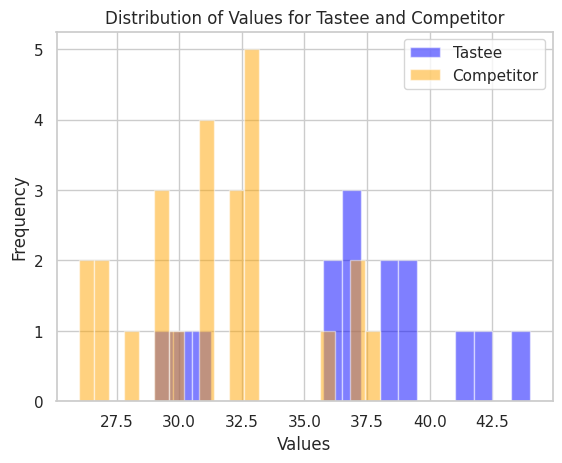

In [34]:
# We vizualize both samples to see if we have normal distribution

# Assuming you have 'tastee' and 'competitor' defined as numpy arrays

# Create histograms for each sample
plt.hist(tastee, alpha=0.5, label='Tastee', color='blue', bins=20)
plt.hist(competitor, alpha=0.5, label='Competitor', color='orange', bins=20)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values for Tastee and Competitor')

# Add a legend
plt.legend()

# Show the plot
plt.show()

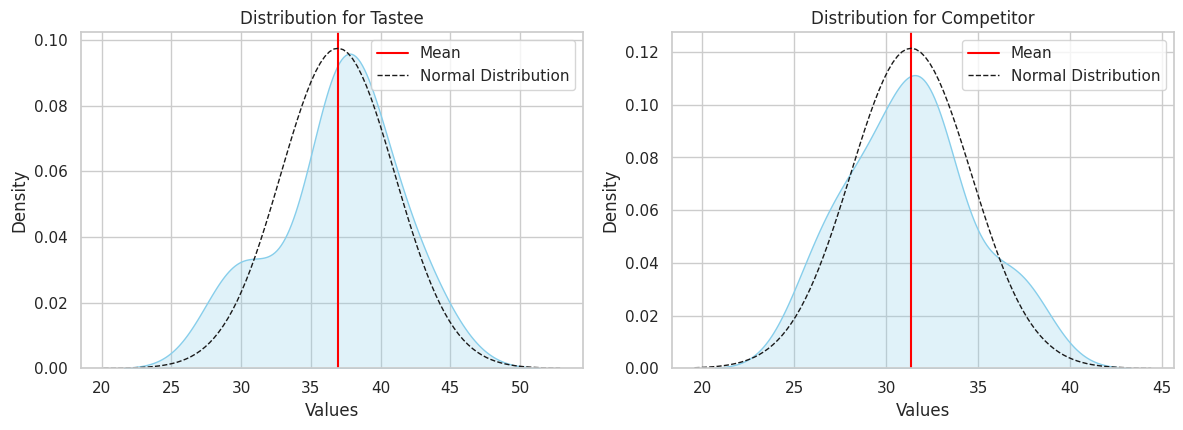

In [35]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot density curve (KDE) for each sample with mean and normal distribution lines
plt.figure(figsize=(12, 8))

samples = [tastee, competitor]
sample_labels = ['Tastee', 'Competitor']

for i, (sample, label) in enumerate(zip(samples, sample_labels), start=1):
    plt.subplot(2, 2, i)

    # Plot the density curve (KDE)
    sns.kdeplot(data=sample, fill=True, color='skyblue')

    # Calculate mean and standard deviation
    mean = np.mean(sample)
    std = np.std(sample)

    # Plot a line for the mean
    plt.axvline(mean, color='red', linestyle='solid', linewidth=1.5, label='Mean')

    # Plot a dotted line for normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k--', linewidth=1, label='Normal Distribution')

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution for {label}')
    plt.legend()

plt.tight_layout()
plt.show()

Both samples are somewhat bell shaped. The weight gains may be normally distributed.

## Exercise 13.22 (UNEQUAL VARIANCE T-TEST)

A statistics professor is about to select a statistical software package for her course. One of the most important features, according to the professor, is the ease with which students learn to use the software. She has narrowed the selection to two possibilities: software A, a menu driven statistical package with some highpowered techniques, and software B, a spreadsheet that has the capability of performing most techniques. To help make her decision, she asks 40 statistics students selected at random to choose one of the two packages. She gives each student a statistics problem to solve by computer and the appropriate manual. The amount of time (in minutes) each student needed to complete the assignment was recorded.

In [36]:
# Import data
# Import data
file_path = 'https://github.com/saoter/AQM2023/raw/main/Workshop%204/data/Xr13-22.xlsx'
data = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [37]:
data

,Package A,Package B
0,88,55.0
1,83,57.0
2,70,67.0
3,81,47.0
4,98,46.0
5,55,60.0
6,41,58.0
7,114,56.0
8,90,79.0
9,89,49.0


In [38]:
# Clean dataset
Package_A = data['Package A'].dropna()
Package_B = data['Package B'].dropna()

a) Can the professor conclude from these data that the two software packages differ in the amount of time needed to learn how to use them? (Use a 1% significance level).


**Null Hypothesis:**
$$ H_0: \mu_{A} - \mu_{B} = 0 $$

**Alternative Hypothesis:**
$$ H_0: \mu_{A} - \mu_{B} > 0 $$

In [39]:
alpa = 0.01
n1 = len(Package_A)
n2 = len(Package_B)

x1 = Package_A.mean()
x2 = Package_B.mean()

var_1 = Package_A.var()
var_2 = Package_B.var()

print("n1 = ",n1)
print("n2 = ",n2)

print("x1 = ",x1)
print("x2 = ",x2)

print("Package A variance = ", var_1)
print("Package B variance = ", var_2)

n1 =  24
n2 =  16
x1 =  70.41666666666667
x2 =  56.4375
Package A variance =  421.9927536231884
Package B variance =  81.4625


In [40]:
# We use F test to check if variances are equal
df1 = n1 - 1
df2 = n2 - 1

# Calculate the F-statistic
F_statistic = var_1 / var_2

# Calculate critical F-statistic values for the rejection region
critical_upper = f.ppf(1 - alpha/2, df1, df2)
critical_lower = f.ppf(alpha/2, df1, df2)

# Print the F-statistic and critical F-value
print("The Rejection region is F >", critical_upper, " or F <", critical_lower)
print("F-statistic:", F_statistic)

# Compare the F-statistic with the critical F-value to decide on equal variances
if F_statistic > critical_upper or F_statistic < critical_lower:
    print("The variances are not equal (reject null hypothesis)")
else:
    print("The variances are equal (fail to reject null hypothesis)")

The Rejection region is F > 2.71278716476704  or F < 0.40544092304018564
F-statistic: 5.180208729454514
The variances are not equal (reject null hypothesis)


In [41]:
# Perform two-sample t-test assuming unequal variances
t_statistic, p_value = ttest_ind(Package_A, Package_B, equal_var=False)

# Compare the p-value to your chosen alpha level
alpha = 0.01
if p_value < alpha:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

The difference in means is statistically significant.
T-statistic: 2.9357091086725196
P-value: 0.005939489829056018


P-value is smaller than 0.01, thus we can reject the null hypothesis and infer that the two packages differ in the amount of time needed to learn how to use them.

b) Estimate  with  95%  confidence  the  difference  in  the  mean  amount  of  time  needed  to  learn  to  use  the two packages.

In [42]:
# Calculate the standard error of the difference in means
standard_error = np.sqrt((var_1 / n1) + (var_2 / n2))

alpha = 0.05

# Calculate the degrees of freedom for the t-distribution
df = ((var_1 / n1 + var_2 / n2)**2) / (((var_1 / n1)**2 / (n1 - 1)) + ((var_2 / n2)**2 / (n2 - 1)))

# Calculate the margin of error for a 95% confidence interval
margin_of_error = t.ppf(1 - alpha/2, df) * standard_error

# Calculate the lower and upper bounds of the 95% confidence interval
lower_bound = (x1 - x2) - margin_of_error
upper_bound = (x1 - x2) + margin_of_error

# Print the 95% confidence interval
print("LCL = ", lower_bound)
print("UCL = ", upper_bound)
print(f"CI =  ", (x1 - x2)," \u00B1 ", margin_of_error)

LCL =  4.300944412297598
UCL =  23.657388921035746
CI =   13.979166666666671  ±  9.678222254369073


c) What  are  the  required  conditions  for  the  techniques used in parts (a) and (b)?

Times used to finish assignments in both samples need to be normally distributed.

d) Check to see whether the required conditions are satisfied.

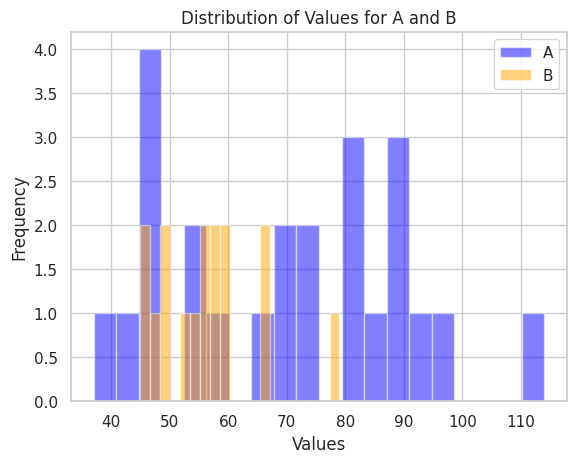

In [43]:
# Create histograms for each sample
plt.hist(Package_A, alpha=0.5, label='A', color='blue', bins=20)
plt.hist(Package_B, alpha=0.5, label='B', color='orange', bins=20)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values for A and B')

# Add a legend
plt.legend()

# Show the plot
plt.show()

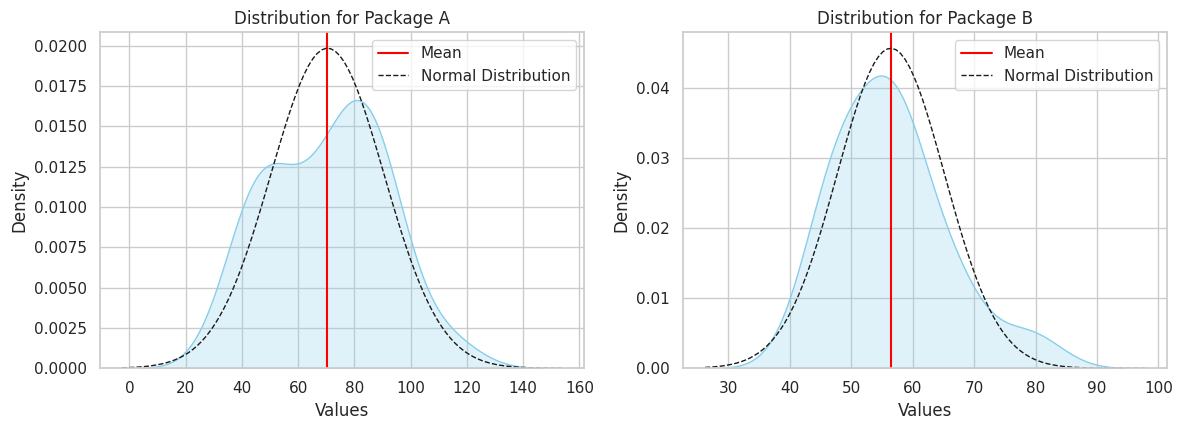

In [44]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot density curve (KDE) for each sample with mean and normal distribution lines
plt.figure(figsize=(12, 8))

samples = [Package_A, Package_B]
sample_labels = ['Package A', 'Package B']

for i, (sample, label) in enumerate(zip(samples, sample_labels), start=1):
    plt.subplot(2, 2, i)

    # Plot the density curve (KDE)
    sns.kdeplot(data=sample, fill=True, color='skyblue')

    # Calculate mean and standard deviation
    mean = np.mean(sample)
    std = np.std(sample)

    # Plot a line for the mean
    plt.axvline(mean, color='red', linestyle='solid', linewidth=1.5, label='Mean')

    # Plot a dotted line for normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k--', linewidth=1, label='Normal Distribution')

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution for {label}')
    plt.legend()

plt.tight_layout()
plt.show()

The histograms are somewhat bell shaped.

## Exercise 13.95 DIFFERENCE BETWEEN TWO POPULATION PROPORTION

Random   samples   from   two   binomial   populations   yielded the following statistics:

In [45]:
p1 = 0.45  # Sample proportion for population 1
n1 = 100    # Sample size for population 1
p2 = 0.40  # Sample proportion for population 2
n2 = 100    # Sample size for population 2


a) Calculate   the   p-value   of   a   test   to   determine   whether we can infer that the population proportions differ.



**Null Hypothesis:**
$$ H_0: p_{\text{1}} - p_{\text{2}} = 0 $$

**Alternative Hypothesis:**
$$ H_A: p_{\text{1}} - p_{\text{2}} \neq 0 $$

In [46]:
# Given data
p1 = 0.45  # Sample proportion for population 1
n1 = 100    # Sample size for population 1
p2 = 0.40  # Sample proportion for population 2
n2 = 100    # Sample size for population 2

# Step 1: Calculate the combined sample proportion
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)

# Step 2: Calculate the standard error
SE = np.sqrt(p_combined * (1 - p_combined) * ((1 / n1) + (1 / n2)))

# Step 3: Calculate the test statistic (Z)
Z = (p1 - p2) / SE

# Step 4: Calculate the two-tailed p-value using the standard normal distribution
p_value = 2 * (1 - norm.cdf(abs(Z)))

print("Z-statistic:", Z)
print("Two-tailed p-value:", p_value)

Z-statistic: 0.7151985398521514
Two-tailed p-value: 0.4744863711713392


b) Repeat part (a) increasing the sample sizes to 400.

In [47]:
# Given data
p1 = 0.45  # Sample proportion for population 1
n1 = 400    # Sample size for population 1
p2 = 0.40  # Sample proportion for population 2
n2 = 400    # Sample size for population 2

# Step 1: Calculate the combined sample proportion
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)

# Step 2: Calculate the standard error
SE = np.sqrt(p_combined * (1 - p_combined) * ((1 / n1) + (1 / n2)))

# Step 3: Calculate the test statistic (Z)
Z = (p1 - p2) / SE

# Step 4: Calculate the two-tailed p-value using the standard normal distribution
p_value = 2 * (1 - norm.cdf(abs(Z)))

print("Z-statistic:", Z)
print("Two-tailed p-value:", p_value)

Z-statistic: 1.4303970797043029
Two-tailed p-value: 0.1526030859375278


c) Describe what happens to the p-value when the sample sizes increase.


The p-value decreases.

### Exercise 13.98

Many stores sell extended warranties for products they sell. These are very lucrative for store owners. To learn more about who buys these warranties a random sample of a store's customers who recently purchased a product for which an extended warranty was available was drawn. Among other variables each respondent reported whether they paid the regular price or a sale price and whether they purchased an extended warranty?

Can we conclude at the 10% significance level that those who paid the regular price are more likely to buy an extended warranty?



**Null Hypothesis:**
$$ H_0: p_{\text{1}} - p_{\text{2}} = 0 $$

**Alternative Hypothesis:**
$$ H_A: p_{\text{1}} - p_{\text{2}} > 0 $$

In [48]:
# Given data
x1 = 47
n1 = 229
x2 = 25
n2 = 178

# Step 1: Calculate sample proportions
p1 = x1/n1
p2 = x2/n2

# Step 2: Calculate the combined sample proportion
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)

# Step 3: Calculate the standard error
SE = np.sqrt(p_combined * (1 - p_combined) * ((1 / n1) + (1 / n2)))

# Step 4: Calculate the test statistic (Z)
Z = (p1 - p2) / SE

# Step 5: Calculate the two-tailed p-value using the standard normal distribution
p_value = 1 - norm.cdf(abs(Z))

print("Z-statistic:", Z)
print("Two-tailed p-value:", p_value)

Z-statistic: 1.6992184374552217
Two-tailed p-value: 0.04463901684053351


There is enough evidence to conclude that those who paid the regular price are more likely to buy an extended warranty.